# Inflow Performance Relationship (IPR)

## Darcy's Method

In [1]:
import psapy.Vogel as IPR
import psapy.FluidProps as FluidProps
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.interpolate import interp1d
sns.set(color_codes=True)

Input data

In [5]:
Pressure=4000.0
Thickness=75.0
k= 50.0
visc = 0.5
GasGrav=0.65
API= 28.0
GOR= 375.0
Temp=150.0
rw=0.328
re=1053.0
s=-1.5
OilFVF = 1.2

# Darcy's IPR

In [7]:
Psat = FluidProps.Pbub(Temp, 75, 100, GasGrav, API, GOR)
Psat

2370.202357201929

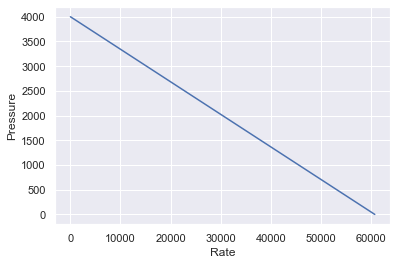

In [13]:
nPoints= 2

IPR_darcy= IPR.Darcy_IPR(k,Thickness,visc, re,rw, s, Pressure, OilFVF, nPoints)
scatter =sns.lineplot(IPR_darcy[0], IPR_darcy[1])
plt.xlabel('Rate')
plt.ylabel('Pressure');

# Vogel's Method

In [15]:
#def VogelIPR(P, Pb, Pwf, Qo, nPoints):

Qo = 500
Pb =2370
P = 2370
Pwf = 2000
nPoints = 10
IPR_vogel= IPR.VogelIPR(P, Pb, Pwf, Qo, nPoints)

#IPR_vogel= IPR.VogelIPR(P, Pb, Pwf, Qo, nPoints)

[[0, 328.853836203962, 627.1166178773232, 894.7883450200835, 1131.8690176322425, 1338.3586357138, 1514.2571992647565, 1659.5647082851121, 1774.2811627748663, 1858.4065627340194, 1911.9409081625715], [2370, 2133.0, 1896.0, 1659.0, 1422.0, 1185.0, 948.0, 711.0, 474.0, 237.0, 0.0]]


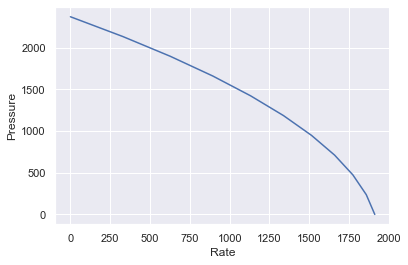

In [16]:
scatter =sns.lineplot(x=IPR_vogel[0], y=IPR_vogel[1], markers = True)
plt.ylabel("Pressure");
plt.xlabel("Rate");

# Vogel combined with Darcy

In [19]:
IPR_comb = IPR.Vogel_DarcyIPR(Pressure, k,Thickness ,visc, re,rw, s, OilFVF,Temp, Pb, nPoints)

3600.0
3200.0
2800.0
2400.0
2000.0
1600.0
1200.0
800.0
400.0
0.0


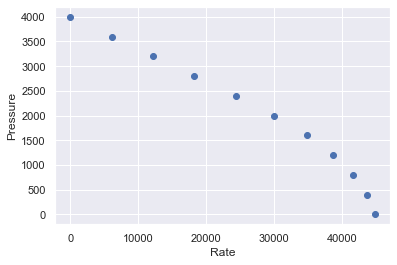

In [20]:
scatter =plt.scatter(IPR_comb[0], IPR_comb[1])
plt.xlabel('Rate')
plt.ylabel('Pressure')
plt.show()


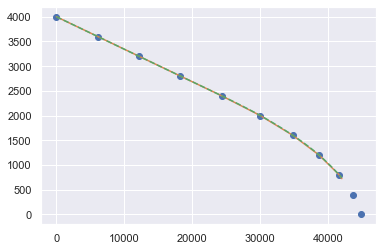

In [25]:
import numpy as np
x=IPR_comb[0]
y=IPR_comb[1]
f = interp1d(x, y)
f2 = interp1d(x, y, kind='cubic')
xnew = np.linspace(0.1, 42000, num=100, endpoint=True)
plt.plot(x, y, 'o', xnew, f(xnew), '-', xnew, f2(xnew), '--');